<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/SEM1/ML/lab_8_logisticregression_binary_gradientdescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression for binary classification using Gradient Descent algorithm

<b>Logistic Regression model</b>  is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

A <b>binary logistic model</b> has a dependent variable with two possible values, such as pass/fail which is represented by labels 1/0.

<div align="right">   Reference: Wikipedia </div>


In <b>logistic classification</b>, the classification is based on the hypothesis $ h_\theta(x) $:

If $ h_\theta(x) \geq 0.5 $ predict $ y = 1 $.

If $ h_\theta(x) < 0.5 $ predict $ y = 0 $.

In other words,  $ 0 \leq h_\theta(x) \leq 1 $.
    

 ![title](images/LogisticRegression.png)

<div align="right">   Reference: techdifferences.com </div>  

The model uses the <b>hypothesis</b> $$ h = h_\theta(x) = g(\theta^T x) $$
    
The <b>Sigmoid function</b> $ g $ is defined as $$ g(z) = \frac{1}{1+e^{-z}} $$

To compute the parameters $\theta$ use the <b>Cost function</b>:
$$ J(\theta) = \frac{1}{m} \big( -y^T log(h) - (1-y)^T log (1-h) \big) $$
and minimize the cost function over $\theta$ using Gradient Descent algorithm.


<b>Gradient descent algorithm</b> is given as

repeat until convergence {
\begin{align*}
    \theta_1 &= \theta_1 - \alpha \frac{1}{m}\sum_{i=1}^{m} \big ( h_\theta (x^{(i)}) - y^{(i)} \big ) * x^{(i)} \\
    \theta_0 &= \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^{m} \big ( h_\theta (x^{(i)}) - y^{(i)} \big )
\end{align*}
}

<div align="right"> Reference: Coursera course on Machine Learning by Andrew Ng </div>

<img src="images/LogisticRegression_breastCancer.png" alt="Drawing" style="width: 500px;"/>
<div align="right">   Reference: mapr.com </div>

## 1. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import and visualize the dataset

In [3]:
# Import the dataset

df = pd.read_csv('Admission.csv')
# change the path as necessary
# Reference dataset taken from Coursera course on Machine Learning by Andrew Ng
print(df.head())

       Exam1     Exam2   Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


In [4]:
# X = first two columns; Exam 1 and Exam 2
X = df.iloc[:, :-1]

# y = target values, last column
Y = df.iloc[:, -1]

# filter out the applicants that got admitted
admitted = df.loc[Y == 1]

# filter out the applicants that did not get admitted
not_admitted = df.loc[Y == 0]


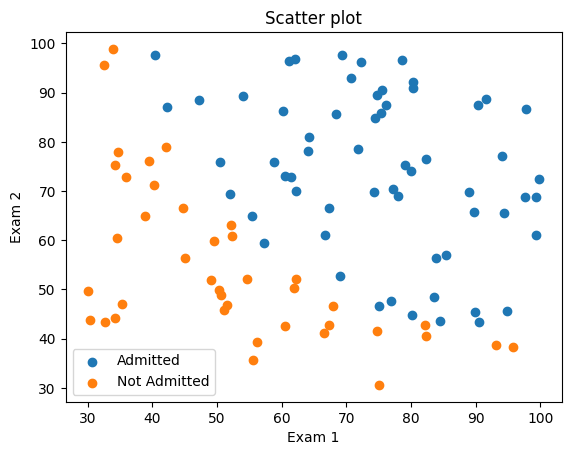

In [5]:
# Visualize
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],  label='Not Admitted')
plt.legend()
plt.title('Scatter plot')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.show()

## 3. Preprocessing the data

In [7]:
from sklearn import preprocessing

# scale the data
# Min max scaler transforms features by scaling each feature to a given range, default is (0,1).
# The transformation is given by:
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

# theta0 + theta1 * x
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# add bias = 1 at column 0
X = np.c_[np.ones((X.shape[0], 1)), X]
print('Size of X' , X.shape)

# make y also a numpy array
Y = Y.to_numpy()[:, np.newaxis]
print('Size of Y ' , Y.shape)

Size of X (100, 4)
Size of Y  (100, 1)


## 4. Define relevant functions

#### Sigmoid function $$ g(z) = \frac{1}{1+e^{-z}} $$

#### Hypothesis $$ h_\theta (x) = g ( \theta^T x ) $$

#### Cost function
$$ J(\theta) = \frac{1}{m} \big( -y^T log(h) - (1-y)^T log (1-h) \big) $$
where $ h = g ( \theta^T x ) $


In [8]:
def sigmoid(a):
    return 1.0 / (1 + np.exp(-a))

def cost(x, y, theta):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    cost = (np.matmul(-y.T, np.log(h)) - np.matmul((1 -y.T), np.log(1 - h)))/m
    return cost

def gradient_Descent(theta, alpha, x , y):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    grad = np.matmul(x.T, (h - y)) / m;
    J = cost(x, y, theta)
    theta = theta - alpha * grad * J
    return theta

## 5. Build the logistic regression model

### Using gradient descent

In [9]:
# create and initialize theta parameters. # X 100 x 3

Theta = np.zeros((X.shape[1], 1))
print('Size of Theta ' , Theta.shape)
print(Theta)

Size of Theta  (4, 1)
[[0.]
 [0.]
 [0.]
 [0.]]


In [10]:
n_iterations = 100000
learning_rate = 0.05 # hyperparameter - fixed by trail and error methods

# to store the cost values
cost_history = []

for i in range( n_iterations+1 ):
    Theta = gradient_Descent(Theta, learning_rate, X, Y)
    J_new = cost(X, Y, Theta)
    cost_history.append(J_new.flatten())
    if i % 10000 == 0:
        print('epoch = {}, cost = {}' .format(i, J_new))

print('Training completed')

# while( new_cost - old_cost < epsilon)
# change the values theta

epoch = 0, cost = [[0.6917313]]
epoch = 10000, cost = [[0.30630304]]
epoch = 20000, cost = [[0.26646831]]
epoch = 30000, cost = [[0.24873341]]
epoch = 40000, cost = [[0.23835523]]
epoch = 50000, cost = [[0.23146086]]
epoch = 60000, cost = [[0.22652913]]
epoch = 70000, cost = [[0.22282558]]
epoch = 80000, cost = [[0.2199469]]
epoch = 90000, cost = [[0.21765115]]
epoch = 100000, cost = [[0.21578349]]
Training completed


In [11]:
print(Theta.flatten()) # theta0, theta1 theta2

[-8.81211407  0.         10.03068616  9.44167873]


## 6. Make predicitons



In [12]:
h = sigmoid(np.matmul(X, Theta)) # h(x) = g(theta.T *x)
y_pred = (h > .5).astype(int)


## 7. Visualize

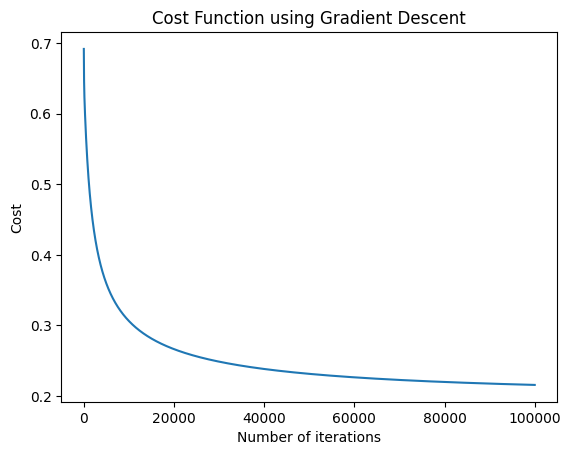

In [13]:
# plot the cost function

plt.plot(cost_history)
plt.title('Cost Function using Gradient Descent')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## 8. Performance Measures

In [14]:
# Compute the accuracy

accuracy = np.mean(y_pred == Y)

print(accuracy * 100)

89.0


In [15]:
print(Y.flatten())

[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]


In [16]:
print(y_pred.flatten())

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]
